## 1. 利用循环语句，计算 $^n{\sqrt {5}}$ 的极限，误差小于 $10^{-8}$

## 解：记 $^n{\sqrt {5}}=x_n,\varepsilon = 10^{-8}$，

## 则 $|x_n-x_{n-1}|<\varepsilon$ 时返回 $x_n, n$

### Code

In [246]:
mutable struct Q1_solver
    ε::Float64
    max_iter::Int #最大迭代次数   
    iter_idx::Int #迭代次数
    x_n::Float64
    x_n_1::Float64
end

In [247]:
lim = Q1_solver(10^-8,10000000,0,1.0,1.0)
lim.ε = 10^-8
lim.max_iter = 10000000
lim.iter_idx = 0
lim.x_n = 5^0.5
lim.x_n_1 = 5^0.5
lim

Q1_solver(1.0000000000000005e-8, 10000000, 0, 2.23606797749979, 2.23606797749979)

In [248]:
while(lim.iter_idx<lim.max_iter)
    lim.x_n_1 = lim.x_n
    lim.x_n = lim.x_n^0.5
    lim.iter_idx += 1
    if abs(lim.x_n-lim.x_n_1)<lim.ε
        break
    end
end
lim.x_n,lim.iter_idx

(1.0000000059956233, 27)

### 所以得到极限为 1.0000000059956233

## 2. 利用级数
## $\frac{\pi}{4}=1-\frac{1}{3}+\frac{1}{5}-\frac{1}{7}+...$，计算 $\pi$ 近似值。
## 已知截断误差小于第一个被舍弃的项$a_{n+1}$的绝对值，若要使截断误差小于 $10^{-4}$ 或 $10^{-8}$，应取多少项？求出 $\pi$ 近似值。

## 解：$a_{n+1}=\frac{1}{2n+1}$, 记截断误差为 $\varepsilon$.
## 若 $a_{n+1}\leq \varepsilon$，返回 $n$ 和 $\pi$ 的近似值。 

In [249]:
mutable struct Q2_solver
    ε::Float64
    max_iter::Int #最大迭代次数
    iter_idx::Int #迭代次数
    n::Int
    sign::Int
    pi::Float64
end

In [250]:
lim = Q2_solver(10^-8,10000000,0,1,1,0.0)
lim.max_iter = 100000000
lim.iter_idx = 0
lim.n = 0
lim.sign = 1
lim.pi = 0
lim

Q2_solver(1.0000000000000005e-8, 100000000, 0, 0, 1, 0.0)

In [251]:
lim.ε = 10^-4
while(lim.n<lim.max_iter)         
    if 4/(2*(lim.n)+1)<lim.ε
        break
    end
    lim.n+=1  
    lim.pi += lim.sign*4/(2*(lim.n)-1)#sum a_n
    lim.sign*=-1
end
if(4/(2*(lim.n)+1)<lim.ε)
    print("succeed")
else
    print("failed")
end
lim.iter_idx,lim.n,lim.pi,1/(2*(lim.n)+1)

succeed

(0, 20000, 3.1415426535898248, 2.499937501562461e-5)

### 所以要使截断误差小于 $10^{-4}$，需要计算 20000 次，对应的 $\pi$ 为 3.14154

In [32]:
lim.ε = 10^-8
lim.max_iter = 200000000
while(lim.n<lim.max_iter)         
    if 4/(2*(lim.n)+1)<lim.ε
        break
    end    
    lim.n+=1  
    lim.pi += lim.sign*4/(2*(lim.n)-1)#sum a_n
    lim.sign*=-1
end
if(4/(2*(lim.n)+1)<lim.ε)
    print("succeed")
else
    print("failed")
end
lim.iter_idx,lim.n,lim.pi,1/(2*(lim.n)+1)

succeed

(0, 200000000, 3.1415926485894077, 2.49999999375e-9)

### 所以要使截断误差小于 $10^{-8}$，需要计算200000000次，对应的 $\pi$ 为 3.141592648

## 3. 在同一坐标系下 画出 $y=\sin x,y_n=\sum_{i=0}^n(-1)^i\frac{x^{2i+1}}{(2i+1)!} ,(n=2,5,10)$
## 的图形，并标注说明各条曲线的含义

In [207]:
using Plots
n_s=[2,5,10]
x= collect(0:0.1:1.6*pi);

┌ Warning: Skipped line arg circle.
└ @ Plots /home/jjx/.julia/packages/Plots/l0VjU/src/args.jl:711
┌ Warning: Skipped line arg star5.
└ @ Plots /home/jjx/.julia/packages/Plots/l0VjU/src/args.jl:711


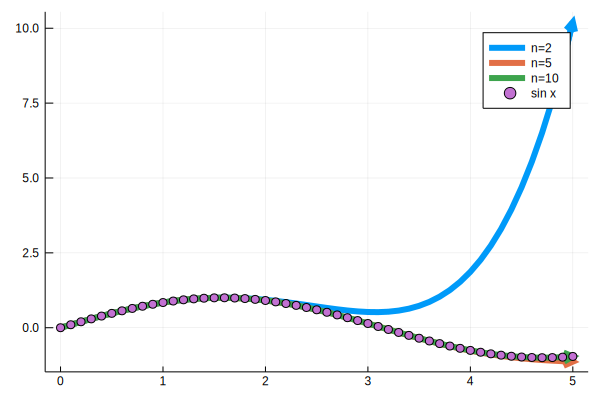

In [209]:
y= [sum([(-1)^i.*x.^(2*i+1)/factorial(big(2*i+1)) for i in collect(0:n)]) for n in n_s]
plot(x,y,label=["n=2","n=5","n=10"],line = (:arrow, :circle, :star5, 1, 6))
plot!(x,sin.(x),label="sin x",seriestype=:scatter)

### 由图像可知，各条曲线为 对 $\sin x$ 在零点附近的不同程度近似，$n$越大，拟合准确的区域范围增大；当$n$足够大时，对$n$ 继续提升，误差的减小变慢（从绝对值上讲）

## 4. 分别将区间 [-10,10] 分为 100,200,400 等份，画出二元函数
$$z=\exp^{-|x|}+\cos(x+y)+\frac{1}{x^2+y^2+1}$$
## 的三维图形

In [222]:
using Plots, ProgressMeter

Currently step: 0.2

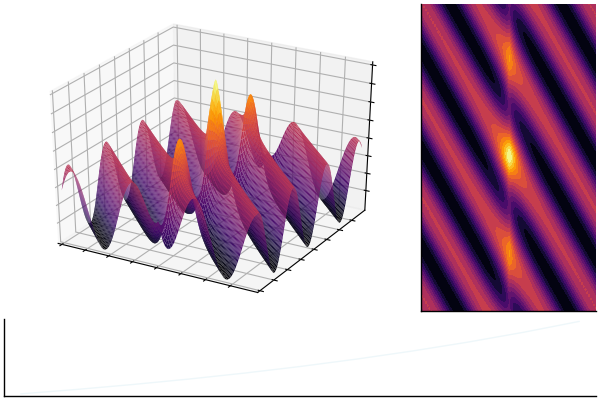

In [241]:
#分成100份
step = 20 ./ 100
print("Currently step: ", step)
x= collect(-10:step:10-step);
y= collect(-10:step:10-step);
pyplot(leg=false, ticks=nothing) #change to the pyplot backend and define some defaults

f(x,y) = exp(-abs(x))+cos(x+y)+1/(x^2+y^2+1)
    # create a plot with 3 subplots and a custom layout
l = @layout [a{0.7w} b; c{0.2h}]
p = plot(x, y, f, st = [:surface, :contourf], layout=l)
plot!(p[3], z, alpha = 0.2, palette = cgrad(:blues).colors)

Currently step: 0.1

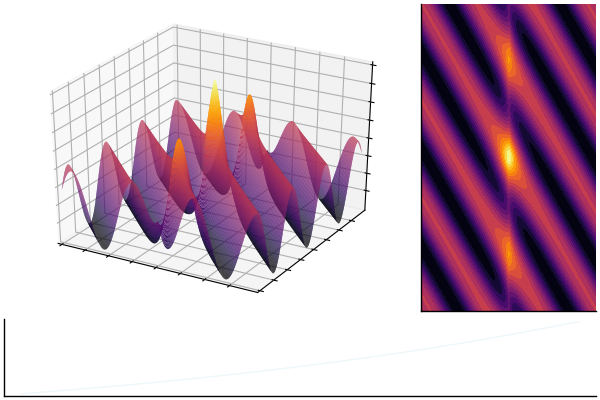

In [242]:
#分成200份
step = 20 ./ 200
print("Currently step: ", step)
x= collect(-10:step:10-step);
y= collect(-10:step:10-step);
pyplot(leg=false, ticks=nothing) #change to the pyplot backend and define some defaults

f(x,y) = exp(-abs(x))+cos(x+y)+1/(x^2+y^2+1)
    # create a plot with 3 subplots and a custom layout
l = @layout [a{0.7w} b; c{0.2h}]
p = plot(x, y, f, st = [:surface, :contourf], layout=l)
plot!(p[3], z, alpha = 0.2, palette = cgrad(:blues).colors)

Currently step: 0.05

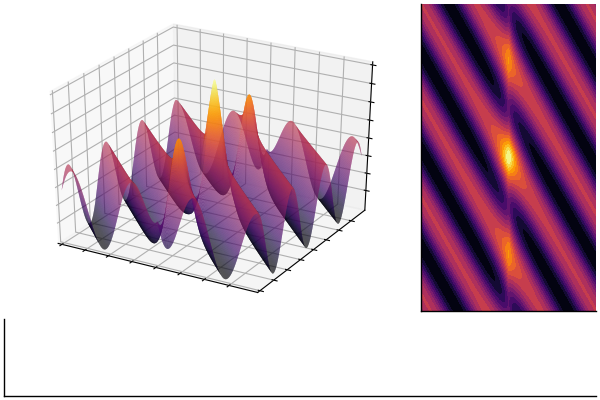

In [245]:
#分成400份
step = 20 ./ 400
print("Currently step: ", step)
x= collect(-10:step:10-step);
y= collect(-10:step:10-step);
pyplot(leg=false, ticks=nothing) #change to the pyplot backend and define some defaults
f(x,y) = exp(-abs(x))+cos(x+y)+1/(x^2+y^2+1)
l = @layout [a{0.7w} b; c{0.2h}]
p = plot(x, y, f, st = [:surface, :contourf], layout=l)